bottom
Saved in: diag1.png


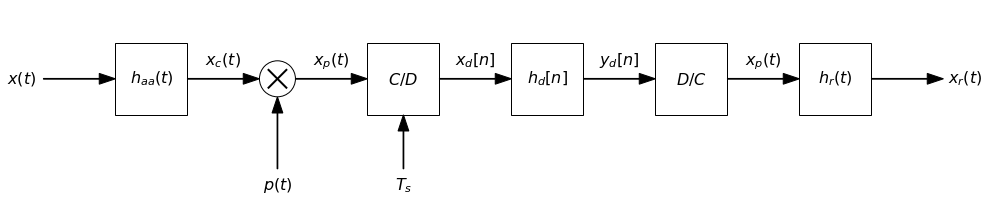

In [4]:
from blockdiagrams import DiagramBuilder

db = DiagramBuilder(block_length=1, fontsize=16)

# Dibujo del diagrama
db.add("x(t)", kind="input")
db.add("h_{aa}(t)", kind="block")
db.add("x_c(t)", kind="arrow")
db.add("mult", kind="combiner", input_text="p(t)", operation='mult', side='bottom')
db.add("x_p(t)", kind="arrow")
db.add("C/D", kind="block_uparrow",input_bottom_text="T_s")
db.add("x_d[n]", kind="arrow")
db.add("h_d[n]", kind="block")
db.add("y_d[n]", kind="arrow")
db.add("D/C", kind="block")
db.add("x_p(t)", kind="arrow")
db.add("h_r(t)", kind="block")
db.add("x_r(t)", kind="output")

#db.show()
db.show(savepath = "diag1.png")
# 3.25 0 2 0.25

Saved in: diag2.png


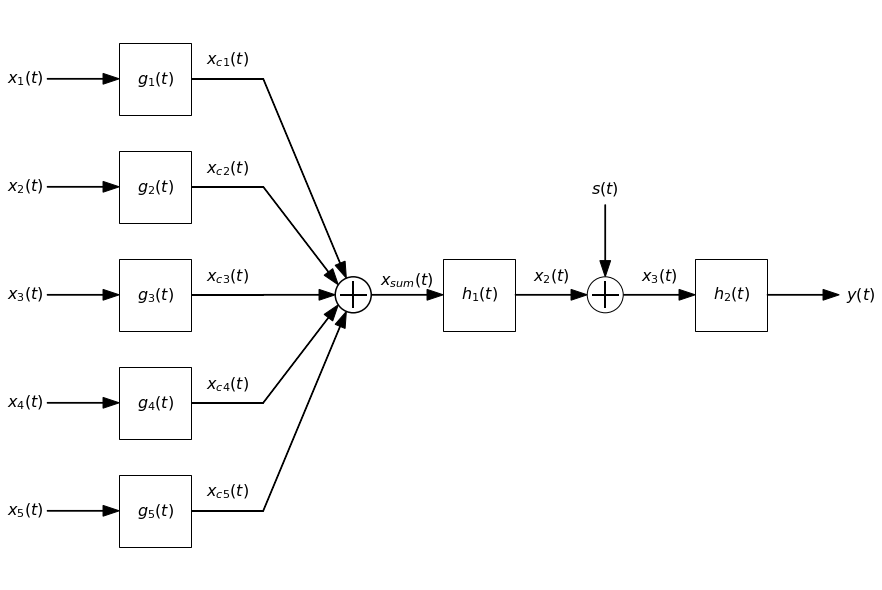

In [3]:
from blockdiagrams import DiagramBuilder
import numpy as np

db = DiagramBuilder(block_length=1, fontsize=16)

y_pos = np.linspace(3, -3, 5)
x_pos = np.zeros_like(y_pos)
inputs_pos = np.column_stack((x_pos, y_pos))

input_threads = []

# Input branches
for cont in np.arange(inputs_pos.shape[0]):
    thread = "line" + str(cont + 1)
    input_threads.append(thread)

    name = "x_" + str(cont + 1) +"(t)"
    db.add(name, kind="input", thread = thread, position=(inputs_pos[cont]))
    name =  "g_" + str(cont + 1) +"(t)"
    db.add(name, kind="block", thread = thread)
    name = "x_{c" + str(cont + 1) + "}(t)"
    db.add(name, kind="line", thread = thread)

# Adder
db.add("x_{sum}(t)", kind="mult_combiner", inputs=input_threads, position='auto', operation='sum')

# Resto del diagrama
db.add("h_1(t)", kind="block")
db.add("x_2(t)", kind="arrow")
db.add("mult", kind="combiner", input_text="s(t)", operation='sum', side='top')
db.add("x_3(t)", kind="arrow")
db.add("h_2(t)", kind="block")
db.add("y(t)", kind="output")

db.show(savepath = "diag2.png")